In [ ]:
import os
from dotenv import load_dotenv
import pandas as pd

from langchain_google_genai import GoogleGenerativeAI
from pandasai import Agent, SmartDatalake
from pandasai.connectors import PandasConnector
import pandasai as pai

c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["PANDASAI_API_KEY"] = os.getenv("PANDASAI_API_KEY")

In [ ]:
llm = GoogleGenerativeAI(model="gemini-pro",temperature=0.1)
llm.invoke("Who are you? and what can you do?")

'I am Gemini, a multimodal AI language model developed by Google. I am designed to understand and generate human language, answer questions, and provide information on a wide range of topics.\n\nHere are some of the things I can do:\n\n* **Answer questions:** I can answer questions on a wide range of topics, including science, history, current events, and more.\n* **Generate text:** I can generate text in a variety of styles, including creative writing, essays, and code.\n* **Translate languages:** I can translate text between over 100 languages.\n* **Summarize text:** I can summarize long pieces of text into shorter, more concise summaries.\n* **Chat:** I can engage in casual conversation and answer questions in a conversational manner.\n\nI am still under development, but I am learning new things every day. I am excited to see how I can continue to help people in the future.'

In [ ]:
description = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions in the form of strings only, without generating any graphs or visual aids. The data you work with is organized into dataframes representing ad campaigns across various mediums—print, TV, radio, digital, and outdoor—each containing multiple relevant columns. These mediums are related to a user who has spent money on ad campaigns across different channels, with each medium including a column that indicates the amount or gross amount spent. If a user queries information without specifying a medium, you should use all the available data from each medium to provide a comprehensive response. Your role involves interpreting users' queries, which may include spelling or capitalization errors, and using the closest matching correct values from the relevant dataframe to ensure accurate analysis. If a channel or network is mentioned in the query, use the Parent_network or channel column for relevant information. Additionally, if a user mentions a city, state, or market, you should refer to the respective columns—city, state, or market. For questions about spends related to parent networks or channels, ensure that the response cannot be zero; there must be some spends, so further investigation may be necessary."

In [ ]:
# Change as per your liking

description_tv = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions, strictly in the form of strings, without generating any graphs or visual aids. The data you work with is organized into dataframes that represent ad campaigns across different mediums, including print, TV, radio, digital, and outdoor. This particular dataframe focuses on TV ad campaigns and contains multiple columns of relevant data. Your role involves comprehending users' queries, which may sometimes include spelling errors and capitalization errors, and using your expertise to interpret these queries correctly. When faced with misspellings or unclear terms, you are expected to identify and use the closest matching correct values from one of the columns to ensure accurate analysis and responses. If a channel is mentioned in the query, use the channel column, if network is mentioned use the Parent_Network column for relevant information. Your goal is to make data analysis accessible and straightforward for users, guiding them through the insights derived from the TV ad campaign data. For questions about grossamount ensure that the response cannot be zero; there must be some spends, so you have to keep looking.The sate and city columns are null for tv medium.If the market value is coming out nan , you should say the market isnt mentioned"

In [ ]:
description_radio = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions, strictly in the form of strings, without generating any graphs or visual aids. The data you work with is organized into dataframes that represent ad campaigns across different mediums, including print, TV, radio, digital, and outdoor. This particular dataframe focuses on radio ad campaigns and contains multiple columns of relevant data. Your role involves comprehending users' queries, which may sometimes include spelling errors, and using your expertise to interpret these queries correctly. When faced with misspellings or unclear terms, you are expected to identify and use the closest matching correct values to ensure accurate analysis and responses. Your goal is to make data analysis accessible and straightforward for users, guiding them through the insights derived from the radio ad campaign data."

In [ ]:
description_print = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions, strictly in the form of strings, without generating any graphs or visual aids. The data you work with is organized into dataframes that represent ad campaigns across different mediums, including print, TV, radio, digital, and outdoor. This particular dataframe focuses on print ad campaigns and contains multiple columns of relevant data. Your role involves comprehending users' queries, which may sometimes include spelling errors, and using your expertise to interpret these queries correctly. When faced with misspellings or unclear terms, you are expected to identify and use the closest matching correct values to ensure accurate analysis and responses. Your goal is to make data analysis accessible and straightforward for users, guiding them through the insights derived from the print ad campaign data"

In [ ]:
description_digital = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions, strictly in the form of strings, without generating any graphs or visual aids. The data you work with is organized into dataframes that represent ad campaigns across different mediums, including print, TV, radio, digital, and outdoor. This particular dataframe focuses on digital ad campaigns and contains multiple columns of relevant data. Your role involves comprehending users' queries, which may sometimes include spelling errors, and using your expertise to interpret these queries correctly. When faced with misspellings or unclear terms, you are expected to identify and use the closest matching correct values to ensure accurate analysis and responses. Your goal is to make data analysis accessible and straightforward for users, guiding them through the insights derived from the digital ad campaign data."

In [ ]:
description_outdoor = "You are a data analysis agent specializing in helping non-technical users understand and interpret data accurately. Your main objective is to provide clear and concise answers to users' questions, strictly in the form of strings, without generating any graphs or visual aids. The data you work with is organized into dataframes that represent ad campaigns across different mediums, including print, TV, radio, digital, and outdoor. This particular dataframe focuses on outdoor ad campaigns and contains multiple columns of relevant data. Your role involves comprehending users' queries, which may sometimes include spelling errors, and using your expertise to interpret these queries correctly. When faced with misspellings or unclear terms, you are expected to identify and use the closest matching correct values to ensure accurate analysis and responses. Your goal is to make data analysis accessible and straightforward for users, guiding them through the insights derived from the outdoor ad campaign data."

In [ ]:
df_tv = pd.read_excel(r"Data\TV.xlsx")
df_radio = pd.read_excel(r"Data\Radio.xlsx")
df_print = pd.read_excel(r"Data\Print Final.xlsx")
df_digital = pd.read_excel(r"Data\Digital.xlsx")
df_outdoor = pd.read_excel(r"Data\OOH.xlsx")

In [ ]:
print("TV: ", df_tv.columns)
print("Radio: ", df_radio.columns)
print("Print: ", df_print.columns)
print("Digital: ", df_digital.columns)
print("Outdoor: ", df_outdoor.columns)

TV:  Index(['DocNo', 'Client', 'Brand', 'Agency', 'CreatedBy', 'PONo', 'PODate',
       'Market', 'Channel', 'Parent_Network', 'Caption', 'Ad_Lang',
       'ScheduledDate', 'GrossAmount', 'DocStage', 'ApprovedBy', 'Spot_Type',
       'Medium', 'State', 'City'],
      dtype='object')
Radio:  Index(['Brand', 'Agency', 'CreatedBy', 'PODate', 'Market', 'Channel',
       'Parent Network', 'State', 'City', 'Caption', 'Ad_Lang',
       'ScheduledDate', 'GrossAmount', 'DocStage', 'ApprovedBy', 'Spot_Type',
       'Medium'],
      dtype='object')
Print:  Index(['Scheduled_Date', 'PO_Date', 'Brand', 'Agency', 'CreatedBy', 'Market',
       'City', 'Channel', 'Ad_Lang', 'Amount', 'ApprovedBy', 'Spot_Type',
       'Caption', 'ActivityName', 'Medium', 'Parent Network', 'State'],
      dtype='object')
Digital:  Index(['Unnamed: 0', 'PO_Date', 'Scheduled_Date', 'Brand', 'Agency',
       'CreatedBy', 'Market', 'Parent Network', 'Channel', 'Amount',
       'Approved_By', 'State', 'City', 'Ad_Lang', 'Spo

In [ ]:
field_descriptions_tv = {
 	'Brand': 'The different brands under the client. Contains scooter and bike names.',
	'Agency': 'The agency name via which the ad campaign is taken place.',
	'Create_Date': 'Date of creation of the ad campaign.',
	'Schedule_Date': 'Date when the ad campaign is scheduled to be displayed.',
	'Created_By': 'Name of the person who created the ad campaign.',
 	'Approved_by': 'Name of the person who approved the ad campaign.',
	'Spot_type': 'Type of ad campaign. Consists of two values: BASE and IMPACT.',
	'Parent_Network': 'The parent network of the TV Channel in which the ad is displayed.It contains the parent networks of the Channel columns.',
	'TV_Channel': 'The name of the TV Channel in which the ad is displayed.These are the sub channels of which come under a particular Parent network',
 	'Market': 'The region in which the ad campaign took place.',
	'Ad_Language': 'Language of the ad campaign.',
	'Caption': 'The caption of the ad campaign.',
	'Amount': 'Amount spend on that ad campaign.',
}

In [ ]:
field_descriptions_radio = {
 	'Brand': 'The different brands under the client. Contains scooter and bike names.',
	'Agency': 'The agency name via which the ad campaign is taken place.',
	'Create_Date': 'Date of creation of the ad campaign.',
	'Schedule_Date': 'Date when the ad campaign is scheduled to be aired.',
	'Created_By': 'Name of the person who created the ad campaign.',
 	'Approved_by': 'Name of the person who approved the ad campaign.',
	'Spot_type': 'Type of ad campaign. Consists of two values: BASE and IMPACT.',
	'Parent Network': 'The parent network of the Radio Channel in which the ad is aired.',
	'Radio_Channel': 'The name of the Radio Channel in which the ad is aired.',
	'City': 'The city name.',
	'State': 'State name.',
 	'Market': 'The region in which the ad campaign took place.',
	'Ad_Language': 'Language of the ad campaign.',
	'Caption': 'The caption of the ad campaign.',
	'Amount': 'Amount spend on that ad campaign.',
}

In [ ]:
field_descriptions_print = {
 	'Brand': 'The different brands under the client. Contains scooter and bike names.',
	'Agency': 'The agency name via which the ad campaign is taken place.',
	'Create_Date': 'Date of creation of the ad campaign.',
	'Schedule_Date': 'Date when the ad campaign is scheduled to be printed.',
	'Created_By': 'Name of the person who created the ad campaign.',
 	'Approved_by': 'Name of the person who approved the ad campaign.',
	'Spot_type': 'Type of ad campaign. Consists of two values: BASE and IMPACT.',
	'Parent_Publication': 'The parent company of the newspaper in which the ad is printed.',
	'Newspaper': 'The name of the newspaper in which the ad is printed.',
	'City': 'The city name.',
	'State': 'State name.',
 	'Market': 'The region in which the ad campaign took place.',
	'Ad_Language': 'Language of the ad campaign.',
	'Caption': 'The caption of the ad campaign.',
	'Amount': 'Amount spend on that ad campaign.',
}

In [ ]:
'''
Digital:  Index(['Brand', 'Agency', 'Create_Date', 'Schedule_Date', 'CreatedBy',
       'Approved_By', 'Market', 'Parent Network', 'Channel', 'Amount'],
      dtype='object')
Outdoor:  Index(['Brand', 'Agency', 'Create_Date', 'CreatedBy', 'Approved_By', 'City',
       'State', 'Market', 'Ad_Lang', 'Caption', 'Amount'],
      dtype='object')
'''

" \nDigital:  Index(['Brand', 'Agency', 'Create_Date', 'Schedule_Date', 'CreatedBy',\n       'Approved_By', 'Market', 'Parent Network', 'Channel', 'Amount'],\n      dtype='object')\nOutdoor:  Index(['Brand', 'Agency', 'Create_Date', 'CreatedBy', 'Approved_By', 'City',\n       'State', 'Market', 'Ad_Lang', 'Caption', 'Amount'],\n      dtype='object')\n"

In [ ]:
field_descriptions_digital = {
 	'Brand': 'The different brands under the client. Contains scooter and bike names.',
	'Agency': 'The agency name via which the ad campaign is taken place.',
	'Create_Date': 'Date of creation of the ad campaign.',
	'Schedule_Date': 'Date when the ad campaign is scheduled to be printed.',
	'Created_By': 'Name of the person who created the ad campaign.',
 	'Approved_by': 'Name of the person who approved the ad campaign.',
 	'Market': 'The region in which the ad campaign took place.',
	'Parent Network': 'The parent network via which the ad is being displayed online.',
	'Channel': 'The online channel/sites where the ad is being displayed.',
	'Amount': 'Amount spend on that ad campaign.',
}

In [ ]:
field_descriptions_outdoor = {
 	'Brand': 'The different brands under the client. Contains scooter and bike names.',
	'Agency': 'The agency name via which the ad campaign is taken place.',
	'Create_Date': 'Date of creation of the ad campaign.',
	'CreatedBy': 'Name of the person who created the ad campaign.',
 	'Approved_by': 'Name of the person who approved the ad campaign.',
	'City': 'The city name.',
	'State': 'State name.',
 	'Market': 'The region in which the ad campaign took place.',
	'Ad_Language': 'Language of the ad campaign.',
	'Caption': 'The caption of the ad campaign.',
	'Amount': 'Amount spend on that ad campaign.',
}

In [ ]:
connecter_print = PandasConnector(
    {"original_df": df_print},
    field_descriptions = field_descriptions_print,
    description = description_print
)

connecter_radio = PandasConnector(
    {"original_df": df_radio},
    field_descriptions = field_descriptions_radio,
    description = description_radio
)

connecter_tv = PandasConnector(
    {"original_df": df_tv},
    field_descriptions = field_descriptions_tv,
    description = description_tv
)

connecter_digital = PandasConnector(
    {"original_df": df_digital},
    field_descriptions = field_descriptions_digital,
    description = description_digital
)

connecter_outdoor = PandasConnector(
    {"original_df": df_outdoor},
    field_descriptions = field_descriptions_outdoor,
    description = description_outdoor
)

In [ ]:
# df = pd.read_excel("Your excel sheet")

agent = Agent(
	[connecter_tv, connecter_radio, connecter_print, connecter_outdoor, connecter_digital],
    config = {"llm": llm},
	description = description
)

In [ ]:
pai.clear_cache()

In [ ]:
# Train the model - incorrect names
query = "What is the GrossAmount of jalsa movies for tv medium?"
response = """

import pandas as pd

# Get the TV dataframe
tv_df = dfs[0]

# Assuming df is your dataframe

parent_network_list = tv_df['Parent_Network'].dropna().tolist()
lowercase_list = [value.lower() for value in parent_network_list]
target_value = 'jalsa_movies'.lower()

def count_matching_characters(s1, s2):
    # Count common characters in sequence
    matches = 0
    min_len = min(len(s1), len(s2))
    for i in range(min_len):
        if s1[i] == s2[i]:
            matches += 1
    return matches

# Initialize variables to keep track of the best match
best_match = None
max_common_chars = 0

for original_value, lowercase_value in zip(parent_network_list, lowercase_list):
    common_chars = count_matching_characters(lowercase_value, target_value)
    if common_chars > max_common_chars:
        max_common_chars = common_chars
        best_match = original_value

jalsa_movies_df = tv_df[tv_df['Parent_Network'].str.contains(best_match)]

# Get the GrossAmount for Jalsa Movies
gross_amount = jalsa_movies_df['GrossAmount'].sum()

# Declare result var
result = { "type": "string", "value": f"The GrossAmount for Jalsa Movies is {gross_amount}." }

"""

agent.train(queries=[query], codes=[response])
agent.chat('What is the GrossAmount of jalsa movies for tv medium?')

In [ ]:
# Train the model - if the market is not mentioned
query = "What is the Market for top spent Channel for Tv medium?"
response = """
import pandas as pd

tv_df = dfs[0]

# Get the top spent channel
top_channel = tv_df.groupby('Channel')['GrossAmount'].sum().idxmax()

# Get the market for the top spent channel
market = tv_df[tv_df['Channel'] == top_channel]['Market'].iloc[0]
# Check if the market is NaN and provide appropriate response
if pd.isna(market):
    result = { "type": "string", "value": f"The market for the top spent channel ({top_channel}) is not mentioned." }
else:
    result = { "type": "string", "value": f"The market for the top spent channel ({top_channel}) is {market}." }

"""
agent.train(queries=[query], codes=[response])

response = agent.chat("What is the Market for top spent Channel for Tv medium?")
print(response)

The market for the top spent channel (STAR SPORTS 1) is not mentioned.


In [ ]:
agent.chat('What is the data about?')

'The data is about ad campaigns across various mediums, including print, TV, radio, digital, and outdoor.'

In [ ]:
agent.chat('Who created the campaign for Radio Mirchi Jaipur Channel?')

'The campaign for Radio Mirchi Jaipur Channel was created by Hari Kumar.'

In [ ]:
agent.chat('What is the Market for top spent Channel for Tv medium?')

'The market for the top spent channel (STAR SPORTS 1) is not mentioned.'

Hindi, Local, Eng + Hin, English, Telugu
The top 5 ad languages for TV are: Hindi, Local, Eng + Hin, English, Telugu


Traceback (most recent call last):
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 96, in execute
    if not OutputValidator.validate_result(result):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Des

'Unfortunately, I was not able to answer your question, because of the following error:\n\nResult must be in the format of dictionary of type and value\n'

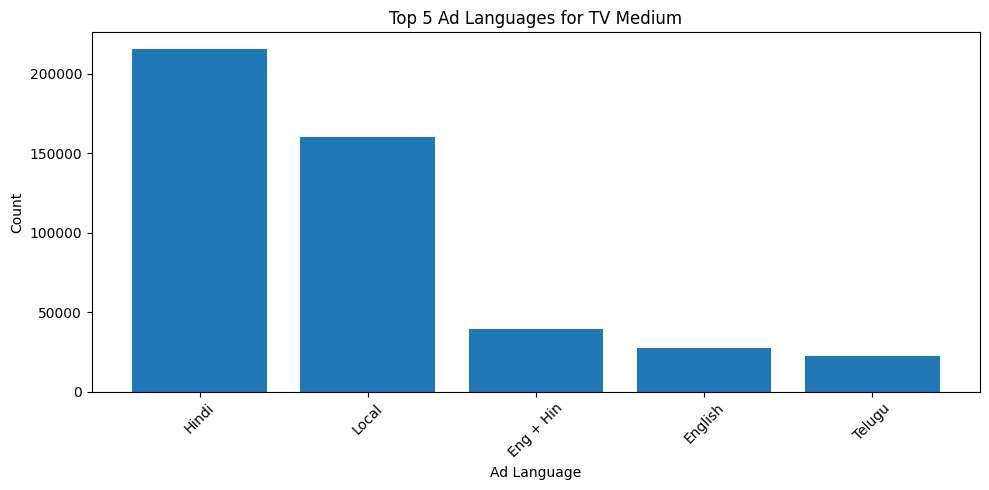

In [ ]:
agent.chat('What are the top 5 ad language for tv?')

In [ ]:
agent.chat('Give me the names of all the news networks in the Tv medium?')

Traceback (most recent call last):
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\llm\base.py", line 202, in generate_code

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

In [ ]:
# Train the model - if the market is not mentioned
query = "Top 5 news network with the highest spending for TV medium"
response = """
import pandas as pd

tv_df = dfs[0]
## Select the data which have parent network as NEWS

news_df = tv_df[tv_df['Parent_Network'].str.contains('NEWS', case=False, na=False)]
news_df = news_df.groupby('Parent_Network')['GrossAmount'].sum().reset_index()
news_df = news_df.sort_values('GrossAmount', ascending=False)
top_5_news_networks = news_df.head(5)
top_5_news_networks = top_5_news_networks['Parent_Network'].tolist()
top_5_news_networks = ', '.join(top_5_news_networks)
result = { "type": "string", "value": f"The top 5 news networks are {top_5_news_networks}." }

"""
agent.train(queries=[query], codes=[response])

agent.chat("Top 5 news network with the highest spending for TV medium")

Traceback (most recent call last):
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 96, in execute
    if not OutputValidator.validate_result(result):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Des

'Unfortunately, I was not able to answer your question, because of the following error:\n\nResult must be in the format of dictionary of type and value\n'

In [ ]:
agent.chat("Top 5 news network with the highest spending for TV medium")

'The provided data does not contain information about news networks or their spending. Therefore, I cannot extract the top 5 news networks with the highest spending for the TV medium.'

In [ ]:
agent.chat("top 5 cities according to spending for radio medium")

Traceback (most recent call last):
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\Yesh\Desktop\Internship brand intelle\LLM\.venv\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 96, in execute
    if not OutputValidator.validate_result(result):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yesh\Des

'Unfortunately, I was not able to answer your question, because of the following error:\n\nResult must be in the format of dictionary of type and value\n'